# Decision Trees

## Sections

1) Decision Tree Classifer 
    
    - visualizing the tree


2) Decision Tree Regressor
    
    - visualizing the tree

In [1]:
import sys
from collections import Counter

import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from matplotlib import pyplot as plt

print('Your Python Version is {}'.format(sys.version[:5]))
print('Your SciKit-Learn Version is {}'.format(sklearn.__version__))

Your Python Version is 3.9.7
Your SciKit-Learn Version is 0.24.2


## Dataset

- Name of Dataset: [Red Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- Summary: *The dataset describes the amount of various chemicals present in wine and their effect on it's quality.*
- Available at [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)

![WineQT](https://storage.googleapis.com/kaggle-datasets-images/4458/6836/30587db9a40233164f65a4a3f148f40d/dataset-cover.jpg?t=2017-11-12-14-28-34)

In [2]:
with open('winequality-red.txt', 'r') as fp:
    lines = fp.read().strip().split('\n')

# first line is the header
header = lines[0].strip().split(',')
feature_names = header[:-1]
target_name = header[-1]

# number of features
L = len(feature_names)
# number of samples
N = 0

X, y = [], []
# each line from the second line are observations ($x_{i}$s)
for i, line in enumerate(lines[1:]):
    N += 1
    row_ = list(map(float, line.strip().split(',')))
    # x_i is a vector/list, y_i is a scaler (integer)
    x_i, y_i = row_[:-1], int(row_[-1])
    assert len(x_i) == L, 'number of features in line number {} is not {}'.format(i, x_i)
    X.append(x_i), y.append(y_i)

print('Number of Observations (N): {}\n'.format(N))
print('Number of Features (L): {}\n'.format(L))
print('Feature Names: \n\t- {}\n\nLabel Name:\n\t- {}'.format('\n\t- '.join(feature_names), target_name))

Number of Observations (N): 1599

Number of Features (L): 11

Feature Names: 
	- fixed acidity
	- volatile acidity
	- citric acid
	- residual sugar
	- chlorides
	- free sulfur dioxide
	- total sulfur dioxide
	- density
	- pH
	- sulphates
	- alcohol

Label Name:
	- quality


### Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

In [4]:
y_train_dist, y_test_dist = Counter(y_train), Counter(y_test)

target_values = set(y_train_dist).union(y_test_dist)

print('{:>8s}{:>8s}{:>8s}{:>8s}'.format('Target', 'Train', 'Test', 'Total'))
for key in target_values:
    train_size = y_train_dist.get(key, 0)
    test_size = y_test_dist.get(key, 0)
    total_ = train_size + test_size
    print('{:>8d}{:>8d}{:>8d}{:>8d}'.format(key, train_size, test_size, total_))

  Target   Train    Test   Total
       3       8       2      10
       4      42      11      53
       5     545     136     681
       6     510     128     638
       7     159      40     199
       8      15       3      18


## Decisition Tree Classifier

In [5]:
clf = DecisionTreeClassifier(
    criterion='entropy', 
    splitter='best', 
    max_depth=15,
    min_samples_split=2, 
    min_samples_leaf=5, 
    max_features=3,
    random_state=42,
)

### Training

In [6]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=3,
                       min_samples_leaf=5, random_state=42)

### Prediction

In [7]:
y_pred_clf = clf.predict(X_test)

### Evaluation

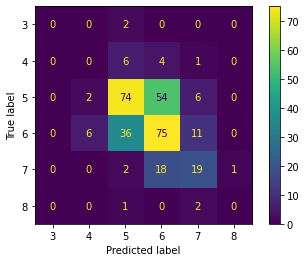

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

plt.show()

In [9]:
class_names = list(map(str, clf.classes_))
# class_names = ['A', 'B', 'C', 'D', 'E', 'F']

print(metrics.classification_report(
    y_true=y_test, 
    y_pred=y_pred_clf,
    target_names=class_names,
    zero_division=0
))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.54      0.58       136
           6       0.50      0.59      0.54       128
           7       0.49      0.47      0.48        40
           8       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.52      0.53      0.52       320



### Plotting

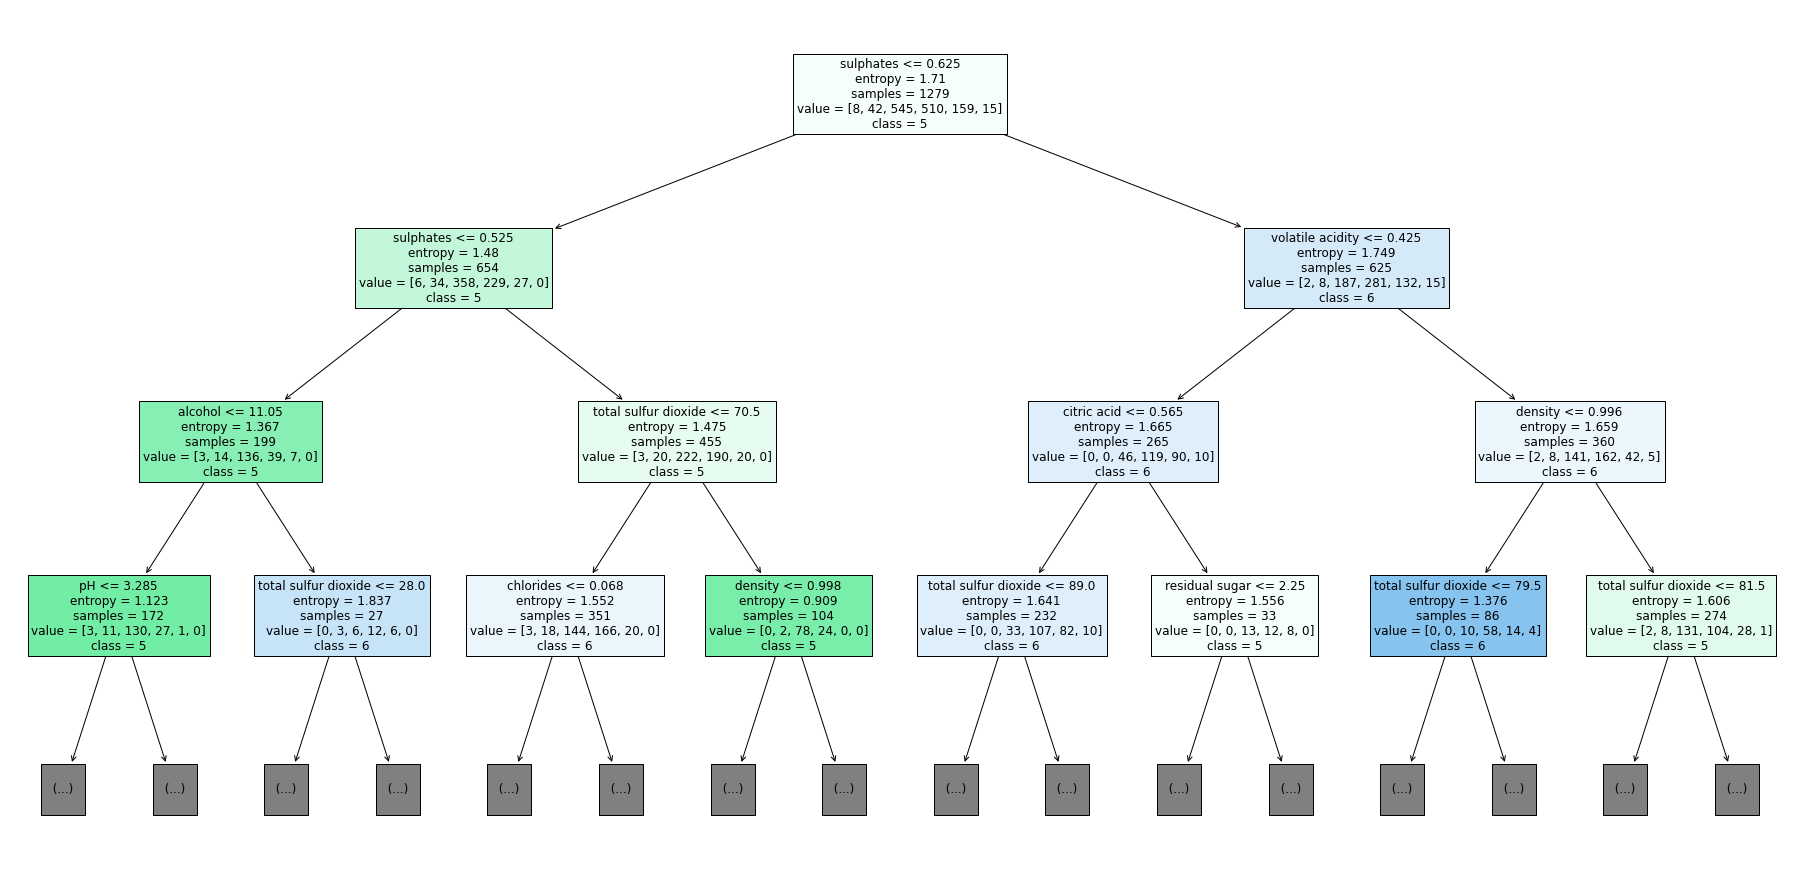

In [10]:
plt.figure(figsize=(32, 16))

tree.plot_tree(
    decision_tree=clf, 
    max_depth=3, 
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=12,
)

plt.show()

## Decisition Tree Regression

In [11]:
_sklearn_version = sklearn.__version__.split('.')[0]

if int(_sklearn_version) >= 1:
    criterion = 'squared_error'
else:
    criterion = 'mse'

reg = DecisionTreeRegressor(
    criterion=criterion, 
    splitter='best', 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=0.1, 
    max_features=3,
    random_state=42,
)

### Training

In [12]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=3, min_samples_leaf=0.1,
                      random_state=42)

### Prediction

In [13]:
y_pred_reg = reg.predict(X_test)

### Evaluation

In [14]:
print('RMSE = {:>0.2f}, MAE = {:>0.2f}'.format(
    metrics.mean_squared_error(y_test, y_pred_reg, squared=False),
    metrics.mean_absolute_error(y_test, y_pred_reg),
))

RMSE = 0.71, MAE = 0.57


### Plotting

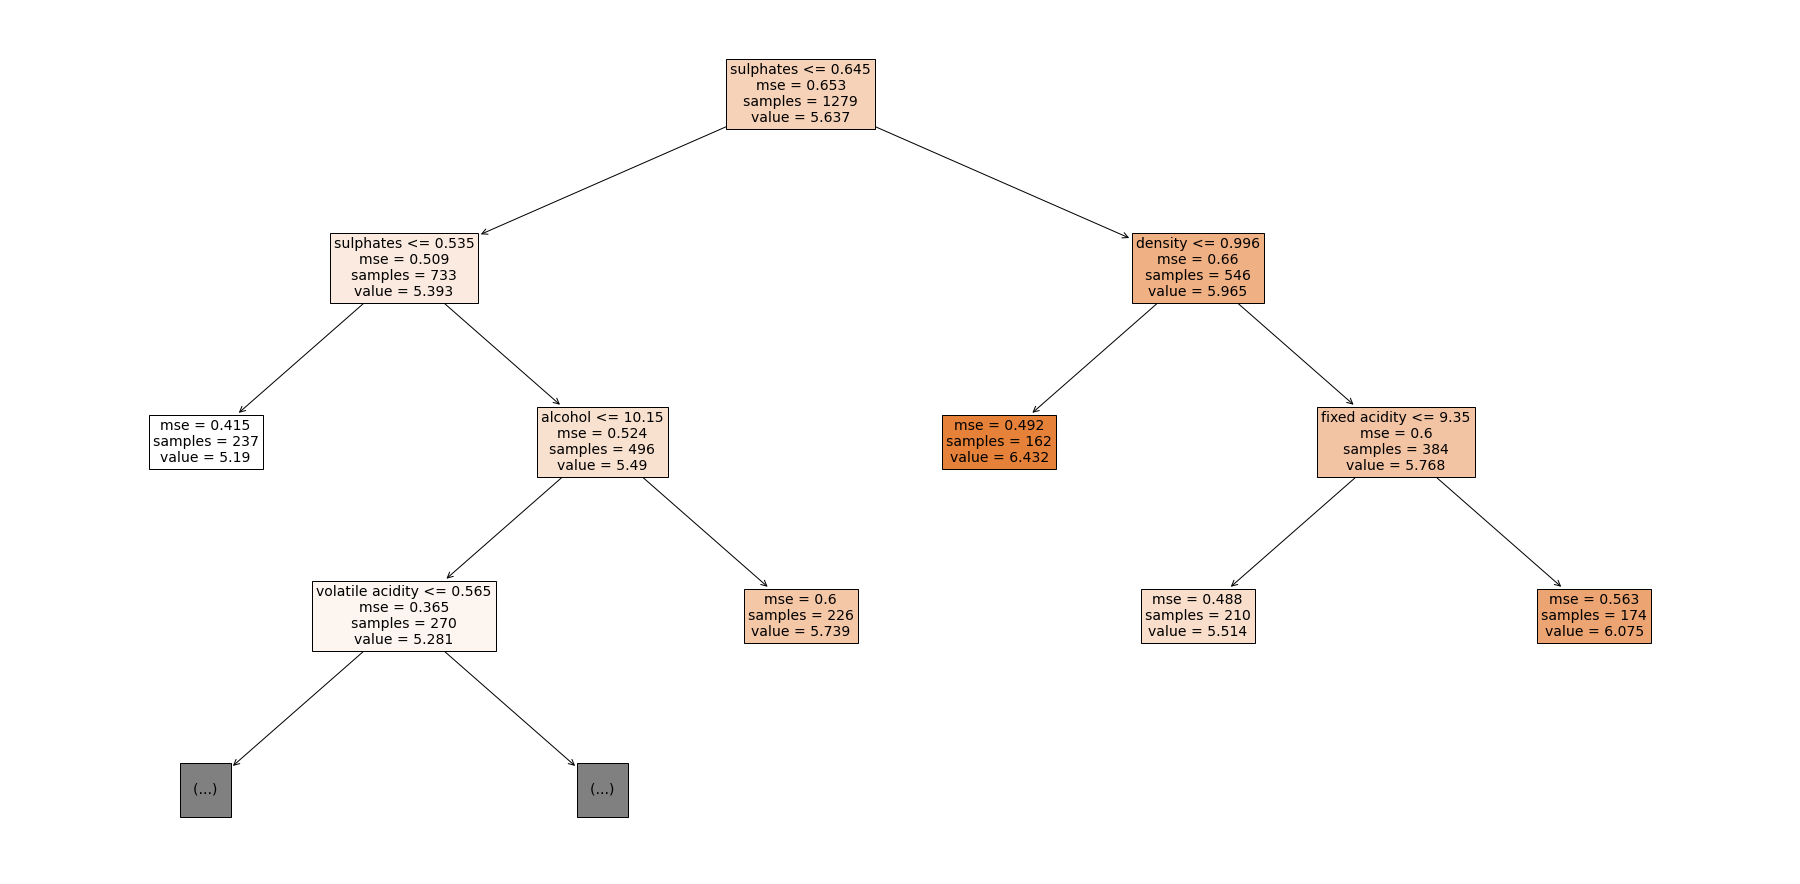

In [15]:
plt.figure(figsize=(32, 16))

tree.plot_tree(
    decision_tree=reg, 
    max_depth=3, 
    feature_names=feature_names, 
    filled=True, 
    fontsize=14
)

plt.show()